# Exercise 7
## Endré Hadzalic

## Task
* Using the UCI Mushroom dataset, use k-means and a suitable cluster evaluation metric to determine the optimal number of clusters in the dataset. Note that this may not necessarily be two (edible versus not-edible).
* Plot this metric while increasing the number of clusters, e.g., $k=2..30$ (see [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html#sphx-glr-auto-examples-cluster-plot-adjusted-for-chance-measures-py) for an example).
* Visualise the data using the number of clusters and a suitable projection or low-dimensional embedding.

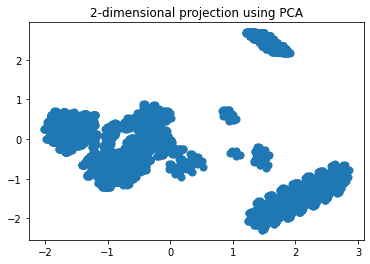

In [17]:
import pandas as pd
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np

#Load the data into a pandas dataframe
df = pd.read_csv('agaricus-lepiota.data')

#Dummify the data
dummied_df = pd.get_dummies(df)

# Project the dataset down to 2 dimensions usin PCA
pca = PCA(n_components=2)

X = pca.fit_transform(dummied_df)

plt.title("2-dimensional projection using PCA")
plt.scatter(X[:, 0], X[:, 1], s=50);


## Finding the optimal number of clusters to cluster the data into.
by comparing the silouette coefficient of a bunch of different cluster sizes we can determine what size is the optimal for this particular dataset.

In [18]:
# A array to save the results of the different cluster sizes into.
result = []

# Using a loop we can iterate through the a range (this time from 2-31 clusters) and save
# the silhouette coefficient of each cluster size into the result array.
for i in range(2,31):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    result.append(metrics.silhouette_score(X,kmeans.labels_,metric='euclidean'))

print("Metrics-silhouette-score per n_clusters: ")
for i in result:
    print(i, end = ' ')

Metrics-silhouette-score per n_clusters: 
0.6097621152143224 0.7778438862811112 0.6786068736937376 0.6979778722517198 0.6262747900229485 0.5852888665939103 0.5905921654382673 0.5894008544693654 0.47795979811143446 0.47981854823888986 0.423696237204847 0.43150622185075016 0.42739694928524996 0.4307142338020232 0.4125224255192886 0.42171899026979803 0.40146859083888853 0.39853219398630957 0.40451825632229915 0.4028357316455172 0.4055840122809047 0.40138604316919996 0.4035403424096708 0.38392021180793356 0.3843112964010928 0.4009782662848985 0.37053232142488957 0.39126714847536 0.3772795450552936 

### Optimal number of clusters visualization

Optimal number of clusters: 3
Silhouette coefficient score for 3 clusters: 0.6979778722517198


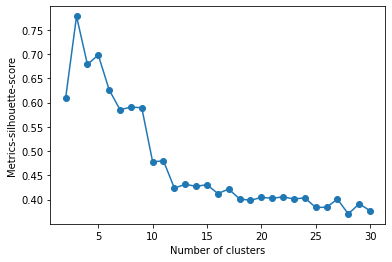

In [21]:
optimal_no_clusters = np.argmax(result, axis=0)+2
print('Optimal number of clusters: %s'%(optimal_no_clusters))
print("Silhouette coefficient score for %s clusters: %s"%(optimal_no_clusters,result[optimal_no_clusters]))

plt.figure()
plt.plot(range(2,31), result, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Metrics-silhouette-score")
plt.show()

## Vizualisation of clusters
Finally we vizualize the clusters and see that the the cluster size of three fits the data well

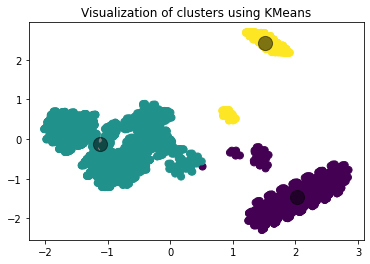

In [20]:
kmeans = KMeans(n_clusters=optimal_no_clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title('Visualization of clusters using KMeans')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);